<a href="https://colab.research.google.com/github/kimsooyoung/iap_hanyang/blob/main/LeNet_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python

Python 3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> 

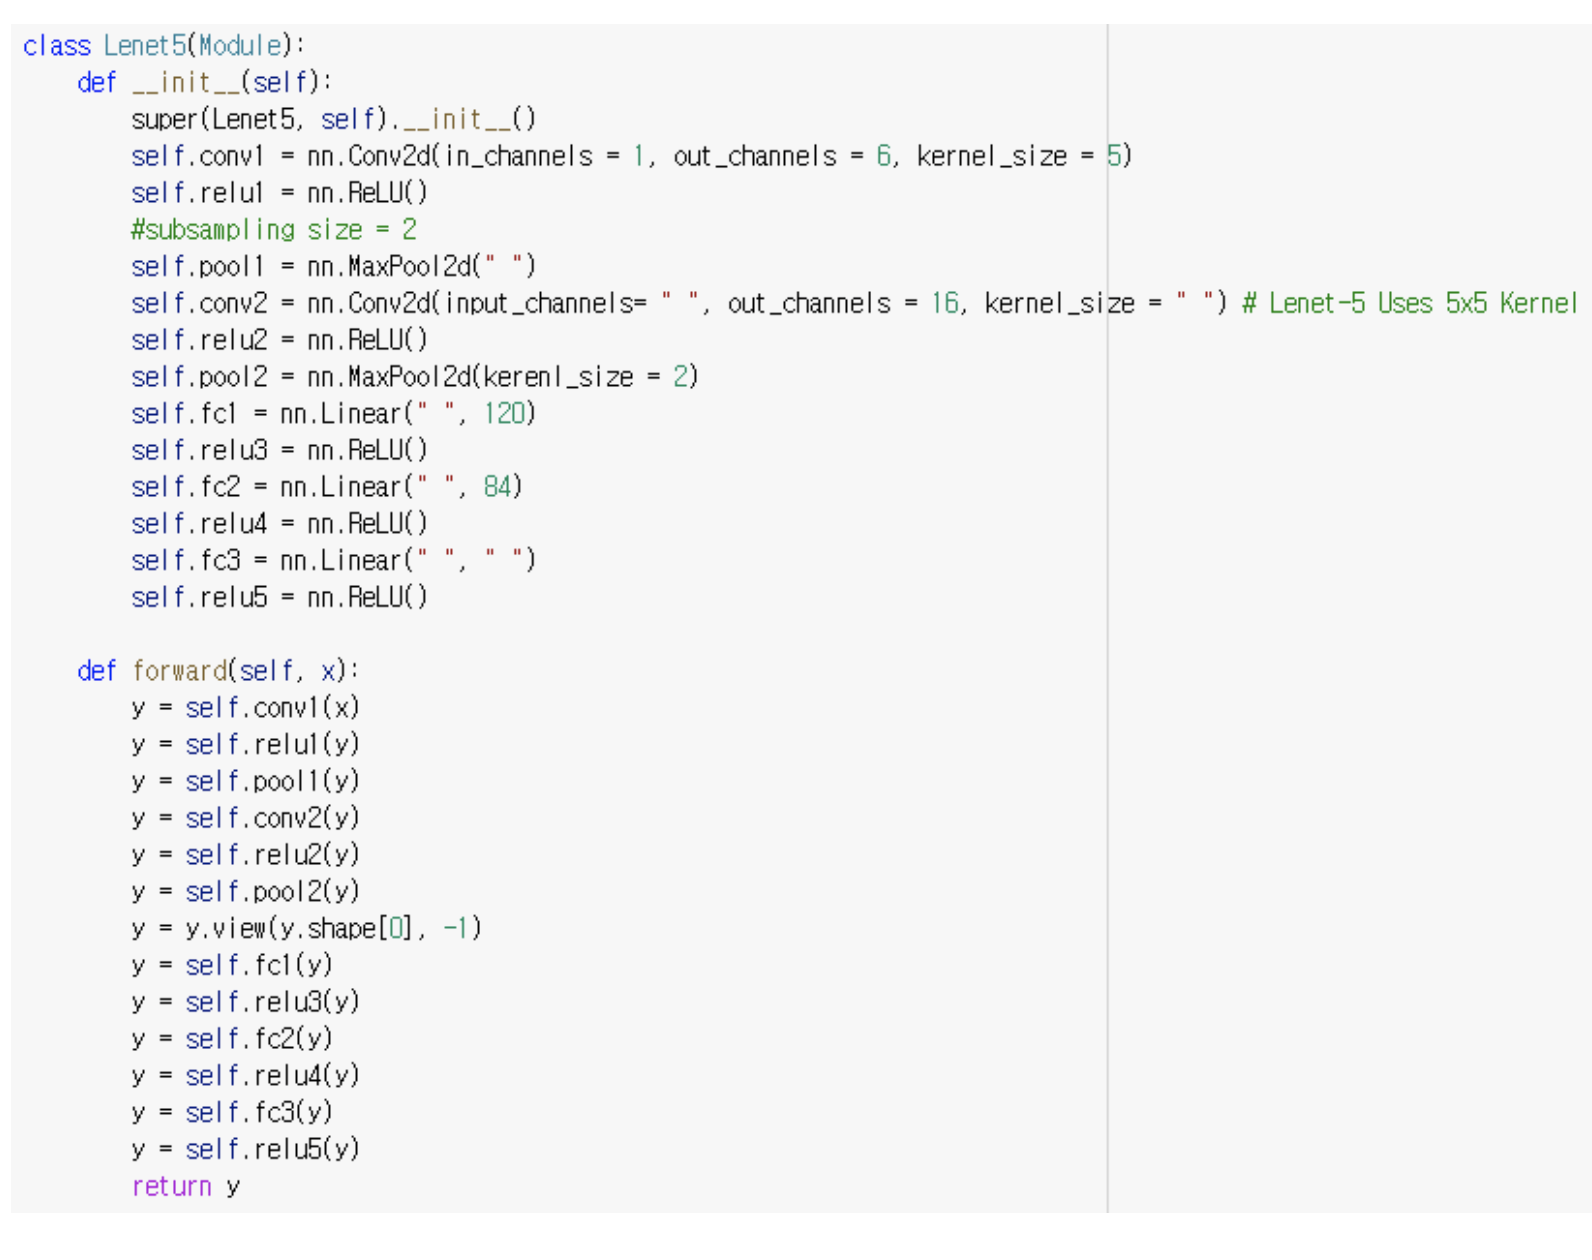

In [8]:
import numpy as np
import torch
from torchvision.datasets import mnist
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

from torch.nn import Module
from torch import nn


class Lenet5(Module):
    def __init__(self):
        super().__init__()
        # batch size / channel / height / width
        # 256 * 1 * 28 * 28
        self.conv1 = nn.Conv2d(1, 6, 5) # input channel output channel kernel size
        # 28 - 5 + 1 = 24
        # 256 * 6 * 24 * 24
        self.relu1 = nn.ReLU()
        #subsampling size = 2
        self.pool1 = nn.MaxPool2d(2)
        # 256 * 6 * 12 * 12 (padding) => 내림
        self.conv2 = nn.Conv2d(6, 16, 5) # Lenet-5 Uses 5x5 Kernel
        # 12 - 5 + 1 = 8
        # 256 * 16 * 8 * 8
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2)
        # 256 * 16 * 4 * 4
        self.fc1 = nn.Linear(256, 120) # 150?
        # 16 * 4 * 4
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, 10)
        self.relu5 = nn.ReLU()

    def forward(self, x):
        y = self.conv1(x)
        y = self.relu1(y)
        y = self.pool1(y)
        y = self.conv2(y)
        y = self.relu2(y)
        y = self.pool2(y)
        y = y.view(y.shape[0], -1)
        y = self.fc1(y)
        y = self.relu3(y)
        y = self.fc2(y)
        y = self.relu4(y)
        y = self.fc3(y)
        y = self.relu5(y)
        return y

In [9]:
input = torch.Tensor(256, 1, 28, 28)
conv1 = nn.Conv2d(1, 6, 5)
out1 = conv1(input)
out1.shape

torch.Size([256, 6, 24, 24])

In [10]:
pool1 = nn.MaxPool2d(2)
out2 = pool1(out1)
out2.shape

torch.Size([256, 6, 12, 12])

In [11]:
conv2 = nn.Conv2d(6, 16, 5)
out3 = conv2(out2)
out3.shape

torch.Size([256, 16, 8, 8])

In [12]:
pool2 = nn.MaxPool2d(2)
out4 = pool2(out3)
out4.shape

torch.Size([256, 16, 4, 4])

In [ ]:
batch_size = 256
train_dataset = mnist.MNIST(root='./train', download=True, train=True, transform=ToTensor())
test_dataset = mnist.MNIST(root='./test', download=True, train=False, transform=ToTensor())
train_loader = DataLoader(train_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)
model = Lenet5()
sgd = SGD(model.parameters(), lr=1e-2, momentum = 0.9)
loss_fn = CrossEntropyLoss()
epoch = 20
step_loss = []
train_step = []

for current_epoch in range(epoch):
    model.train()
    for idx, (train_x, train_label) in enumerate(train_loader):
        sgd.zero_grad()
        predict_y = model(train_x.float())
        loss = loss_fn(predict_y, train_label.long())
        if idx % 10 == 0:
            print('idx: {}, loss: {}'.format(idx, loss.sum().item()))
            step_loss.append(loss.sum().item())
            train_step.append(idx + 230*(current_epoch))
            #print(step_loss)
            #print(train_step)
        loss.backward()
        sgd.step()

    all_correct_num = 0
    all_sample_num = 0
    model.eval()
    for idx, (test_x, test_label) in enumerate(test_loader):
        predict_y = model(test_x.float()).detach()
        predict_y = np.argmax(predict_y, axis=-1)
        current_correct_num = predict_y == test_label
        all_correct_num += np.sum(current_correct_num.numpy(), axis=-1)
        all_sample_num += current_correct_num.shape[0]
    acc = all_correct_num / all_sample_num
    print('accuracy: {:.2f}'.format(acc))
    torch.save(model, './mnist_{:.2f}.pth'.format(acc))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./train/MNIST/raw/train-images-idx3-ubyte.gz to ./train/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./train/MNIST/raw/train-labels-idx1-ubyte.gz to ./train/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./train/MNIST/raw/t10k-images-idx3-ubyte.gz to ./train/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./train/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./train/MNIST/raw



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./test/MNIST/raw/train-images-idx3-ubyte.gz to ./test/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./test/MNIST/raw/train-labels-idx1-ubyte.gz to ./test/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./test/MNIST/raw/t10k-images-idx3-ubyte.gz to ./test/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./test/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./test/MNIST/raw

idx: 0, loss: 2.309516429901123
idx: 10, loss: 2.3057589530944824
idx: 20, loss: 2.3044731616973877
idx: 30, loss: 2.299102544784546
idx: 40, loss: 2.2937235832214355
idx: 50, loss: 2.2933881282806396
idx: 60, loss: 2.288210391998291
idx: 70, loss: 2.2813148498535156
idx: 80, loss: 2.2677724361419678
idx: 90, loss: 2.2624118328094482
idx: 100, loss: 2.241981029510498
idx: 110, loss: 2.182304620742798
idx: 120, loss: 2.118760347366333
idx: 130, loss: 1.9353878498077393
idx: 140, loss: 1.7247660160064697
idx: 150, loss: 1.4083579778671265
idx: 160, loss: 1.2770766019821167
idx: 170, loss: 1.0250544548034668
idx: 180, loss: 1.019049882888794
idx: 190, loss: 0.8267621397972107
idx: 200, loss: 0.9217027425765991
idx: 210, loss: 0.7163368463516235
idx: 220, loss: 0.6530483365058899
idx: 230, loss: 0.4057650566101074
accuracy: 0.77
idx: 0, loss: 0.7515327334403992
idx: 10, loss: 0.6100162267684937
idx: 20, loss: 0.6084

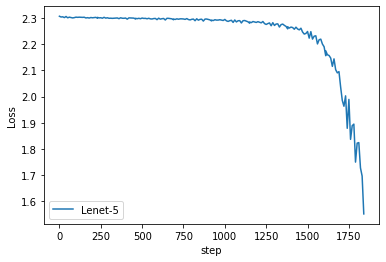

In [ ]:
# you can see the train_loss graph in this code.
import matplotlib.pyplot as plt

plt.plot(train_step, step_loss, label='Lenet-5')
plt.xlabel('step')
plt.ylabel('Loss')
plt.legend()
plt.show()

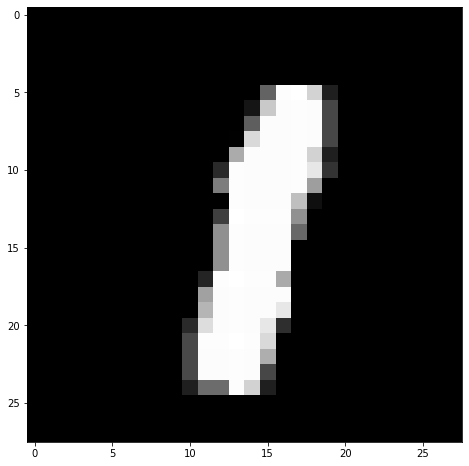

In [ ]:
# You can see the Test data with this code
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(8, 8))

sample_idx = torch.randint(len(test_dataset), size=(1,)).item()
img, label = test_dataset[sample_idx]

plt.imshow(img.squeeze(), cmap="gray")